In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# **USE SHUFFLE DATA**

In [ ]:
data0=pd.read_csv("secondary_data_shuffled.csv", delimiter=';')
data0.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,1.72,x,s,y,f,d,NaN,w,7.01,...,NaN,t,y,NaN,NaN,f,f,NaN,h,u
1,e,9.59,f,e,b,f,NaN,c,b,4.73,...,NaN,NaN,w,NaN,NaN,t,f,NaN,d,a
2,p,0.86,x,g,p,f,a,NaN,p,4.25,...,NaN,s,k,NaN,NaN,f,f,NaN,d,s
3,p,4.32,x,NaN,e,f,x,NaN,w,4.91,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,2.80,x,s,w,f,d,d,w,3.13,...,NaN,NaN,w,NaN,NaN,f,f,NaN,m,a


In [ ]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [ ]:
cat = data0.columns.drop(['cap-diameter','stem-height','stem-width'])
for i in cat:
  data0[i] = data0[i].astype("category")
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 61069 non-null  category
 1   cap-diameter          61069 non-null  float64 
 2   cap-shape             61069 non-null  category
 3   cap-surface           46949 non-null  category
 4   cap-color             61069 non-null  category
 5   does-bruise-or-bleed  61069 non-null  category
 6   gill-attachment       51185 non-null  category
 7   gill-spacing          36006 non-null  category
 8   gill-color            61069 non-null  category
 9   stem-height           61069 non-null  float64 
 10  stem-width            61069 non-null  float64 
 11  stem-root             9531 non-null   category
 12  stem-surface          22945 non-null  category
 13  stem-color            61069 non-null  category
 14  veil-type             3177 non-null   category
 15  ve

In [ ]:
mapping_dict = {
    "class" : {
        "p": "poisonous",
        "e": "edibile"
    },
    "cap-shape" : {
        "b": "bell",
        "c": "conical",
        "x": "convex",
        "f": "flat",
        "s": "sunken",
        "p": "spherical",
        "o": "others"
    },
    "cap-surface" : {
        "i": "fibrous",
        "g": "grooves",
        "y": "scaly",
        "s": "smooth",
        "d": "dry",
        "h": "shiny",
        "l": "leathery",
        "k": "stilky",
        "t": "sticky",
        "w": "wrinkled",
        "e": "fleshy",
        "f": "none"
    },
    "does-bruise-or-bleed" : {
        "t": "yes",
        "f": "no"
    },
    "gill-attachment" : {
        "a": "adnate",
        "x": "adnexed",
        "d": "decurrent",
        "e": "free",
        "s": "sinuate",
        "p": "pores",
        "f": "none",
        "?": "unknown"
    },
    "gill-spacing": {
        "c": "close",
        "d": "distant",
        "f": "none"
    },
    "stem-root": {
        "b": "bulbous",
        "s": "swollen",
        "c": "club",
        "u": "cup",
        "e": "equal",
        "z": "rhizomorphs",
        "r": "rooted"
    },
    "stem-surface" : {
        "i": "fibrous",
        "g": "grooves",
        "y": "scaly",
        "s": "smooth",
        "d": "dry",
        "h": "shiny",
        "l": "leathery",
        "k": "stilky",
        "t": "sticky",
        "w": "wrinkled",
        "e": "fleshy",
        "f": "none"
    },
    "has-ring": {
        "t": "yes",
        "f": "no"
    },
    "ring-type": {
        "c": "cobwebby",
        "e": "evanescent",
        "r": "flaring",
        "g": "grooved",
        "l": "large",
        "p": "pendant",
        "s": "sheathing",
        "z": "zone",
        "y": "scaly",
        "m": "movable",
        "f": "none",
        "?": "unknown"
    },
    "habitat": {
        "g": "grasses",
        "l": "leaves",
        "m": "meadows",
        "p": "paths",
        "h": "heaths",
        "u": "urban",
        "w": "waste",
        "d": "woods",
    },
    "season": {
        "s": "spring",
        "u": "summer",
        "a": "autumn",
        "w": "winter"
    }
}
colors = {"n": "brown",
          "b": "buff",
          "g": "gray",
          "r": "green",
          "p": "pink",
          "u": "purple",
          "e": "red",
          "w": "white",
          "y": "yellow",
          "l": "blue",
          "k": "black",
          "f": "none",
          "o": "orange"}
color_cols = ['cap-color', 'gill-color', 'gill-color', 'stem-color', 'veil-color', 'spore-print-color']

In [ ]:
for col in mapping_dict.keys():
    data0 = data0.replace({col: mapping_dict[col]})
for col in color_cols:
    data0 = data0.replace({col: colors})

In [ ]:
data0

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,edibile,1.72,convex,smooth,yellow,no,decurrent,NaN,white,7.01,...,NaN,sticky,yellow,NaN,NaN,no,none,NaN,heaths,summer
1,edibile,9.59,flat,fleshy,buff,no,NaN,close,buff,4.73,...,NaN,NaN,white,NaN,NaN,yes,none,NaN,woods,autumn
2,poisonous,0.86,convex,grooves,pink,no,adnate,NaN,pink,4.25,...,NaN,smooth,black,NaN,NaN,no,none,NaN,woods,spring
3,poisonous,4.32,convex,NaN,red,no,adnexed,NaN,white,4.91,...,NaN,NaN,white,NaN,NaN,no,none,NaN,woods,summer
4,edibile,2.80,convex,smooth,white,no,decurrent,distant,white,3.13,...,NaN,NaN,white,NaN,NaN,no,none,NaN,meadows,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,poisonous,13.81,convex,stilky,brown,yes,pores,NaN,yellow,10.06,...,club,NaN,yellow,NaN,NaN,no,none,NaN,woods,autumn
61065,poisonous,2.69,convex,dry,white,no,decurrent,distant,pink,3.76,...,NaN,shiny,white,NaN,NaN,no,none,NaN,grasses,autumn
61066,edibile,11.70,flat,NaN,gray,no,sinuate,close,purple,7.36,...,NaN,NaN,buff,NaN,NaN,no,none,NaN,leaves,autumn
61067,poisonous,2.83,sunken,wrinkled,purple,no,adnate,close,purple,5.76,...,NaN,smooth,purple,NaN,NaN,no,none,NaN,woods,autumn


In [ ]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        ax=missing_data.plot(kind = "barh",color='#4baba4',figsize=(10,6))
        for index, value in enumerate(na_df):
            ax.text(value, index, f'{value:.2f}%', ha='left', va='center', color='black')
        print(missing_data)
        plt.title('Biểu đồ tỉ lệ phần trăm mất mát của dữ liệu')
        plt.show()
    else:
        print('No NAs found')

In [ ]:
data0.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [ ]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   class                 61069 non-null  category
 1   cap-diameter          61069 non-null  float64 
 2   cap-shape             61069 non-null  category
 3   cap-surface           46949 non-null  category
 4   cap-color             61069 non-null  category
 5   does-bruise-or-bleed  61069 non-null  category
 6   gill-attachment       51185 non-null  category
 7   gill-spacing          36006 non-null  category
 8   gill-color            61069 non-null  category
 9   stem-height           61069 non-null  float64 
 10  stem-width            61069 non-null  float64 
 11  stem-root             9531 non-null   category
 12  stem-surface          22945 non-null  category
 13  stem-color            61069 non-null  category
 14  veil-type             3177 non-null   category
 15  ve

                   Missing Ratio %
veil-type                94.797688
spore-print-color        89.595376
veil-color               87.861272
stem-root                84.393064
stem-surface             62.427746
gill-spacing             41.040462
cap-surface              23.121387
gill-attachment          16.184971
ring-type                 4.046243


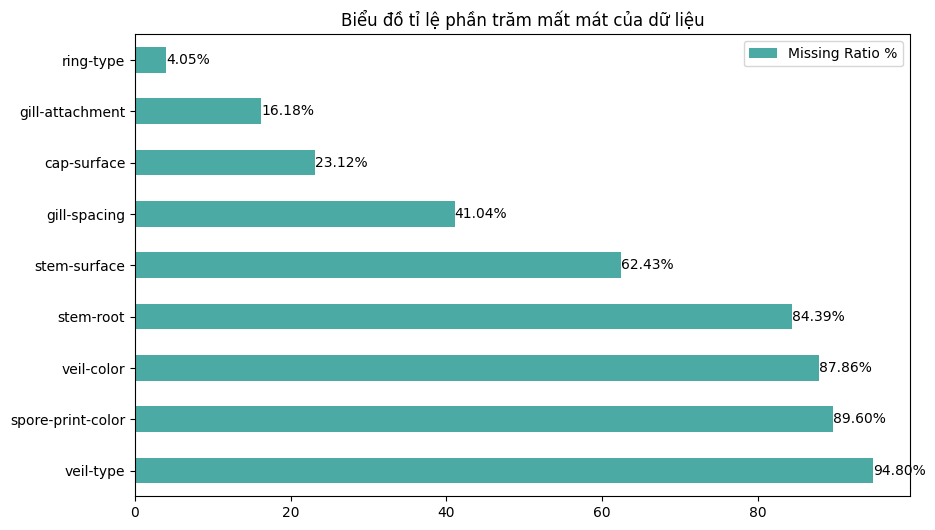

In [ ]:
plot_nas(data0)

In [ ]:
removed_columns=['stem-surface','stem-root','veil-color',
                 'spore-print-color', 'veil-type']
data0=data0.drop(columns=removed_columns)


In [ ]:
from sklearn.impute import SimpleImputer
for col in data.select_dtypes(include=['object']).columns:
  imputer_freq = SimpleImputer(strategy='most_frequent')
  data[col] = imputer_freq.fit_transform(data[col].values.reshape(-1, 1))
data

NameError: ignored

In [ ]:
cat = ['class','does-bruise-or-bleed','has-ring', 'cap-shape','cap-surface','cap-color','gill-attachment','gill-spacing',
             'gill-color','stem-color','ring-type','habitat','season']
num = ['cap-diameter','stem-height', 'stem-width']

In [ ]:
for i in cat:
  print(data0[i].unique())

In [ ]:
data0.head()

In [ ]:
plot_nas(data0)

# **SET MAPPING**

In [4]:
mapping_dict = {
    "class" : {
        "p": "poisonous",
        "e": "edibile"
    },
    "cap-shape" : {
        "b": "bell",
        "c": "conical",
        "x": "convex",
        "f": "flat",
        "s": "sunken",
        "p": "spherical",
        "o": "others"
    },
    "cap-surface" : {
        "i": "fibrous",
        "g": "grooves",
        "y": "scaly",
        "s": "smooth",
        "d": "dry",
        "h": "shiny",
        "l": "leathery",
        "k": "stilky",
        "t": "sticky",
        "w": "wrinkled",
        "e": "fleshy",
        "f": "none"
    },
    "does-bruise-or-bleed" : {
        "t": "yes",
        "f": "no"
    },
    "gill-attachment" : {
        "a": "adnate",
        "x": "adnexed",
        "d": "decurrent",
        "e": "free",
        "s": "sinuate",
        "p": "pores",
        "f": "none",
        "?": "unknown"
    },
    "gill-spacing": {
        "c": "close",
        "d": "distant",
        "f": "none"
    },
    "stem-root": {
        "b": "bulbous",
        "s": "swollen",
        "c": "club",
        "u": "cup",
        "e": "equal",
        "z": "rhizomorphs",
        "r": "rooted"
    },
    "stem-surface" : {
        "i": "fibrous",
        "g": "grooves",
        "y": "scaly",
        "s": "smooth",
        "d": "dry",
        "h": "shiny",
        "l": "leathery",
        "k": "stilky",
        "t": "sticky",
        "w": "wrinkled",
        "e": "fleshy",
        "f": "none"
    },
    "has-ring": {
        "t": "yes",
        "f": "no"
    },
    "ring-type": {
        "c": "cobwebby",
        "e": "evanescent",
        "r": "flaring",
        "g": "grooved",
        "l": "large",
        "p": "pendant",
        "s": "sheathing",
        "z": "zone",
        "y": "scaly",
        "m": "movable",
        "f": "none",
        "?": "unknown"
    },
    "habitat": {
        "g": "grasses",
        "l": "leaves",
        "m": "meadows",
        "p": "paths",
        "h": "heaths",
        "u": "urban",
        "w": "waste",
        "d": "woods",
    },
    "season": {
        "s": "spring",
        "u": "summer",
        "a": "autumn",
        "w": "winter"
    }
}
colors = {"n": "brown",
          "b": "buff",
          "g": "gray",
          "r": "green",
          "p": "pink",
          "u": "purple",
          "e": "red",
          "w": "white",
          "y": "yellow",
          "l": "blue",
          "k": "black",
          "f": "none",
          "o": "orange"}
color_cols = ['cap-color', 'gill-color', 'gill-color', 'stem-color', 'veil-color', 'spore-print-color']

# **USE NO_MISS DATA**

In [5]:
data=pd.read_csv("secondary_data_no_miss.csv", delimiter=';')
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,e,1.26,x,g,y,f,d,c,w,5.04,1.73,y,f,f,d,a
1,e,10.32,f,e,b,f,a,c,b,4.68,19.44,w,t,f,d,a
2,p,0.92,x,g,p,f,a,c,p,4.59,1.15,k,f,f,d,u
3,p,4.27,x,t,p,f,x,c,w,4.55,6.52,w,f,f,d,a
4,e,3.08,f,s,w,f,d,d,w,2.67,5.18,w,f,f,m,a


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-color            61069 non-null  object 
 12  has-ring              61069 non-null  object 
 13  ring-type             61069 non-null  object 
 14  habitat               61069 non-null  object 
 15  season             

In [7]:
num = ['cap-diameter','stem-height', 'stem-width']
bin = ['class','does-bruise-or-bleed','has-ring']
nom = ['cap-shape','cap-surface','cap-color',
       'gill-attachment','gill-spacing','gill-color',
       'stem-color','ring-type','habitat','season']
cat = bin + nom

In [8]:
cat

['class',
 'does-bruise-or-bleed',
 'has-ring',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'ring-type',
 'habitat',
 'season']

In [9]:
for i in data.select_dtypes(include=['object']).columns:
  print(data[i].unique())

['e' 'p']
['x' 'f' 's' 'c' 'o' 'b' 'p']
['g' 'e' 't' 's' 'k' 'h' 'w' 'i' 'y' 'd' 'l']
['y' 'b' 'p' 'w' 'r' 'n' 'g' 'e' 'o' 'k' 'u' 'l']
['f' 't']
['d' 'a' 'x' 'f' 'e' 'p' 's']
['c' 'd' 'f']
['w' 'b' 'p' 'f' 'y' 'n' 'k' 'u' 'o' 'g' 'r' 'e']
['y' 'w' 'k' 'n' 'e' 'u' 'o' 'f' 'g' 'r' 'p' 'b' 'l']
['f' 't']
['f' 'l' 'p' 'g' 'z' 'm' 'r' 'e']
['d' 'm' 'g' 'h' 'l' 'p' 'u' 'w']
['a' 'u' 'w' 's']


In [10]:
for col in mapping_dict.keys():
    data = data.replace({col: mapping_dict[col]})
for col in color_cols:
    data = data.replace({col: colors})

In [11]:
for i in cat:
  print(data[i].unique())

['edibile' 'poisonous']
['no' 'yes']
['no' 'yes']
['convex' 'flat' 'sunken' 'conical' 'others' 'bell' 'spherical']
['grooves' 'fleshy' 'sticky' 'smooth' 'stilky' 'shiny' 'wrinkled'
 'fibrous' 'scaly' 'dry' 'leathery']
['yellow' 'buff' 'pink' 'white' 'green' 'brown' 'gray' 'red' 'orange'
 'black' 'purple' 'blue']
['decurrent' 'adnate' 'adnexed' 'none' 'free' 'pores' 'sinuate']
['close' 'distant' 'none']
['white' 'buff' 'pink' 'none' 'yellow' 'brown' 'black' 'purple' 'orange'
 'gray' 'green' 'red']
['yellow' 'white' 'black' 'brown' 'red' 'purple' 'orange' 'none' 'gray'
 'green' 'pink' 'buff' 'blue']
['none' 'large' 'pendant' 'grooved' 'zone' 'movable' 'flaring'
 'evanescent']
['woods' 'meadows' 'grasses' 'heaths' 'leaves' 'paths' 'urban' 'waste']
['autumn' 'summer' 'winter' 'spring']


In [12]:
data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.746893,6.588775,12.155013
std,5.262972,3.362591,9.989620
min,0.410000,0.000000,0.000000
25%,3.490000,4.640000,5.200000
50%,5.890000,5.960000,10.180000
75%,8.540000,7.760000,16.600000
max,61.580000,35.790000,100.830000


In [13]:
num_feats = ['cap-diameter','stem-height', 'stem-width']
bin_feats = ['class','does-bruise-or-bleed','has-ring']
nom_feats = ['cap-shape','cap-surface','cap-color',
       'gill-attachment','gill-spacing','gill-color',
       'stem-color','ring-type','habitat','season']
cat_feats = bin_feats + nom_feats

In [14]:
palette = ['#8BE8E5', '#A084E8']

In [15]:
sns.set_palette(sns.color_palette('PRGn'))

In [16]:
y = data['class']
y

0          edibile
1          edibile
2        poisonous
3        poisonous
4          edibile
           ...    
61064    poisonous
61065    poisonous
61066      edibile
61067    poisonous
61068    poisonous
Name: class, Length: 61069, dtype: object

In [17]:
X = data.drop(columns=['class'])
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1.26,convex,grooves,yellow,no,decurrent,close,white,5.04,1.73,yellow,no,none,woods,autumn
1,10.32,flat,fleshy,buff,no,adnate,close,buff,4.68,19.44,white,yes,none,woods,autumn
2,0.92,convex,grooves,pink,no,adnate,close,pink,4.59,1.15,black,no,none,woods,summer
3,4.27,convex,sticky,pink,no,adnexed,close,white,4.55,6.52,white,no,none,woods,autumn
4,3.08,flat,smooth,white,no,decurrent,distant,white,2.67,5.18,white,no,none,meadows,autumn


In [18]:
Xmain = pd.get_dummies(X)
Xmain.head(3)

,cap-diameter,stem-height,stem-width,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_others,cap-shape_spherical,cap-shape_sunken,...,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,season_autumn,season_spring,season_summer,season_winter
0,1.26,5.04,1.73,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,10.32,4.68,19.44,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0.92,4.59,1.15,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [19]:
corr_mat = Xmain.corr()
corr_mat

,cap-diameter,stem-height,stem-width,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_others,cap-shape_spherical,cap-shape_sunken,...,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,season_autumn,season_spring,season_summer,season_winter
cap-diameter,1.000000,0.423610,0.698571,-0.190357,-0.098426,-0.007877,0.023352,0.140866,0.089121,0.048165,...,-0.037889,-0.040960,-0.050252,0.031165,-0.002676,0.202422,-0.037887,0.045424,-0.005233,0.042823
stem-height,0.423610,1.000000,0.433756,0.012596,-0.003789,0.067874,0.004863,-0.256831,0.277721,-0.112895,...,-0.021689,0.030535,-0.046071,0.170371,-0.046910,0.056495,0.020213,-0.038702,0.012030,-0.028094
stem-width,0.698571,0.433756,1.000000,-0.221212,-0.082034,0.026627,-0.023758,0.111814,0.136501,0.065701,...,0.006008,-0.055439,0.036577,0.001175,0.002955,0.211384,-0.002489,-0.004088,-0.018430,0.038992
cap-shape_bell,-0.190357,0.012596,-0.221212,1.000000,-0.056250,-0.283677,-0.170812,-0.078753,-0.068787,-0.116332,...,-0.058528,0.089163,-0.024353,-0.015430,-0.024458,-0.131712,-0.032054,0.069056,0.018815,-0.026027
cap-shape_conical,-0.098426,-0.003789,-0.082034,-0.056250,1.000000,-0.155091,-0.093386,-0.043056,-0.037607,-0.063601,...,0.058604,-0.039663,0.087412,-0.008436,-0.013371,-0.045355,-0.011267,0.077598,0.010155,-0.054245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_woods,0.202422,0.056495,0.211384,-0.131712,-0.045355,0.078849,-0.041321,0.100488,-0.068751,0.046372,...,-0.377694,-0.368344,-0.123645,-0.078344,-0.124177,1.000000,0.016837,-0.009026,-0.028125,0.025001
season_autumn,-0.037887,0.020213,-0.002489,-0.032054,-0.011267,0.044269,0.022732,-0.101150,-0.009361,0.016165,...,-0.000874,-0.014200,0.001390,-0.025667,-0.000552,0.016837,1.000000,-0.213575,-0.763731,-0.305456
season_spring,0.045424,-0.038702,-0.004088,0.069056,0.077598,-0.091942,-0.059586,0.189213,0.089688,-0.078441,...,0.007098,0.038008,-0.016421,0.053995,-0.016491,-0.009026,-0.213575,1.000000,-0.167274,-0.066902
season_summer,-0.005233,0.012030,-0.018430,0.018815,0.010155,-0.008284,-0.025431,-0.002558,-0.011709,0.032618,...,-0.038842,0.007805,0.019275,-0.018876,0.021370,-0.028125,-0.763731,-0.167274,1.000000,-0.239237


# **VISUALIZATION**

In [ ]:
palette = ['#f77189','#34ae91']
# sns.set_palette(palette)
sns.set_palette(sns.color_palette('Pastel1'))

In [ ]:
class_count=data['class'].value_counts()
class_count =[class_count['edibile'],class_count['poisonous']]

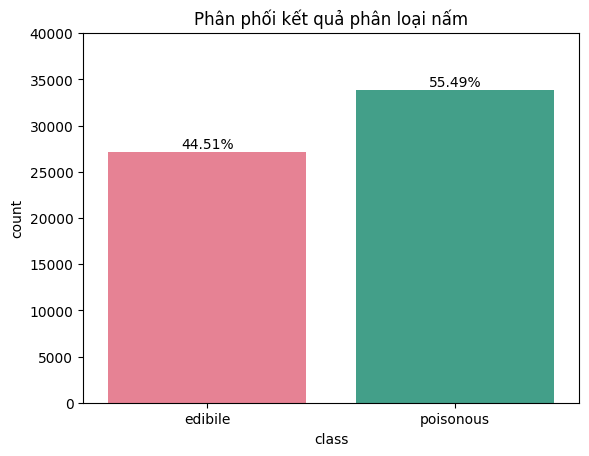

In [ ]:
palette = ['#f77189','#34ae91']
ax = sns.barplot(x=['edibile','poisonous'], y=class_count, palette=palette)
plt.xlabel('class')
plt.ylabel('count')
plt.title('Phân phối kết quả phân loại nấm')
ax.set_ylim(0, 40000)
sum = class_count[0]+class_count[1]
# Thêm chú thích trên từng cột
for i, value in enumerate(class_count):
    ax.text(i, value + 1, str(round(value/sum*100,2))+'%', ha='center', va='bottom')

<Axes: xlabel='cap-diameter', ylabel='Count'>

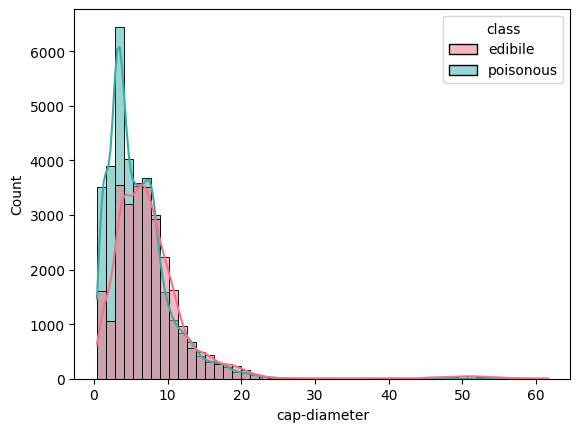

In [ ]:
sns.histplot(data, x='cap-diameter',hue='class', bins=40, kde=True, palette="husl")

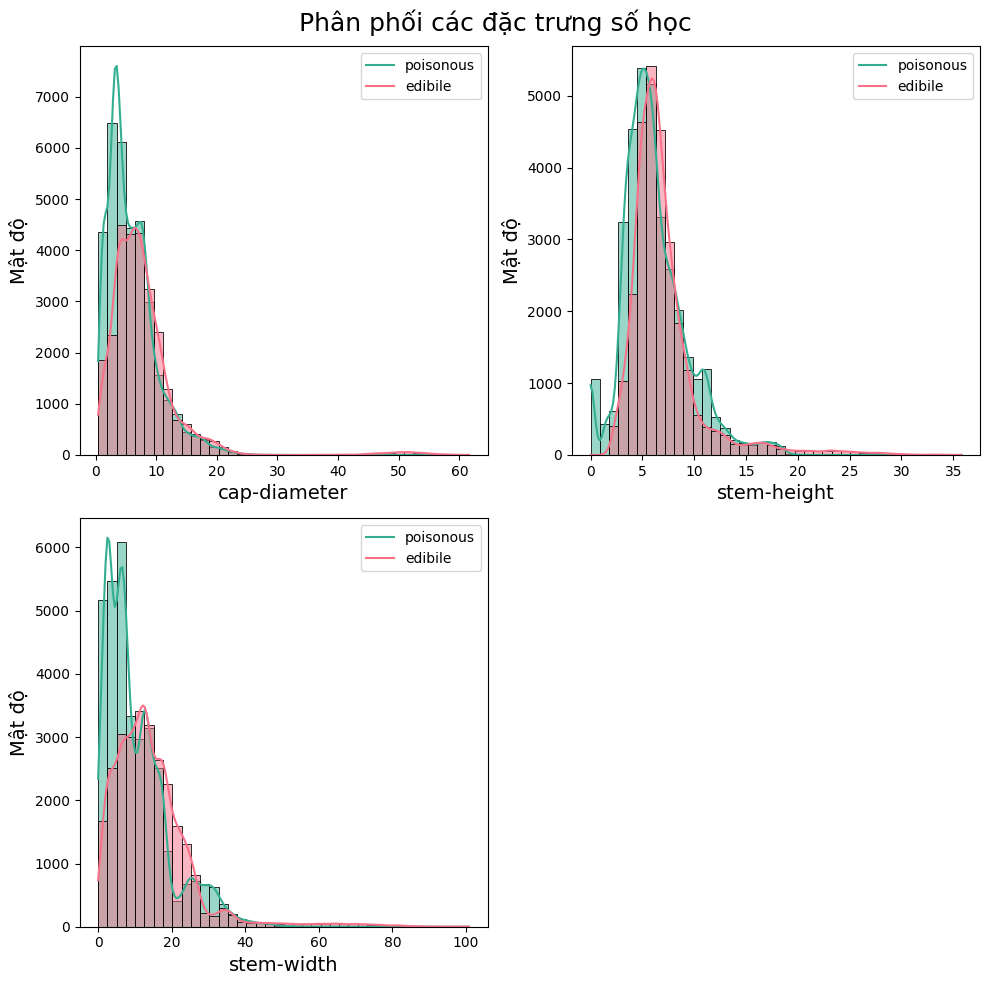

In [ ]:
n_rows = 2
n_cols = 2
size = 5
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*size,n_rows*size))
fig.suptitle("Phân phối các đặc trưng số học",fontsize=18)
k=-1
for i in range(0,n_rows):
  for j in range(0,n_cols):
    k+=1
    if k<len(num):
      ax_i = ax[i,j]
      sns.histplot(data, x=num[k],hue='class', bins=40, kde=True, ax=ax_i)
      ax_i.legend(labels=['poisonous','edibile'])
      ax_i.set_ylabel("Mật độ",fontsize=14)
      ax_i.set_xlabel(num[k],fontsize=14)
ax.flat[-1].set_visible(False)
plt.tight_layout()

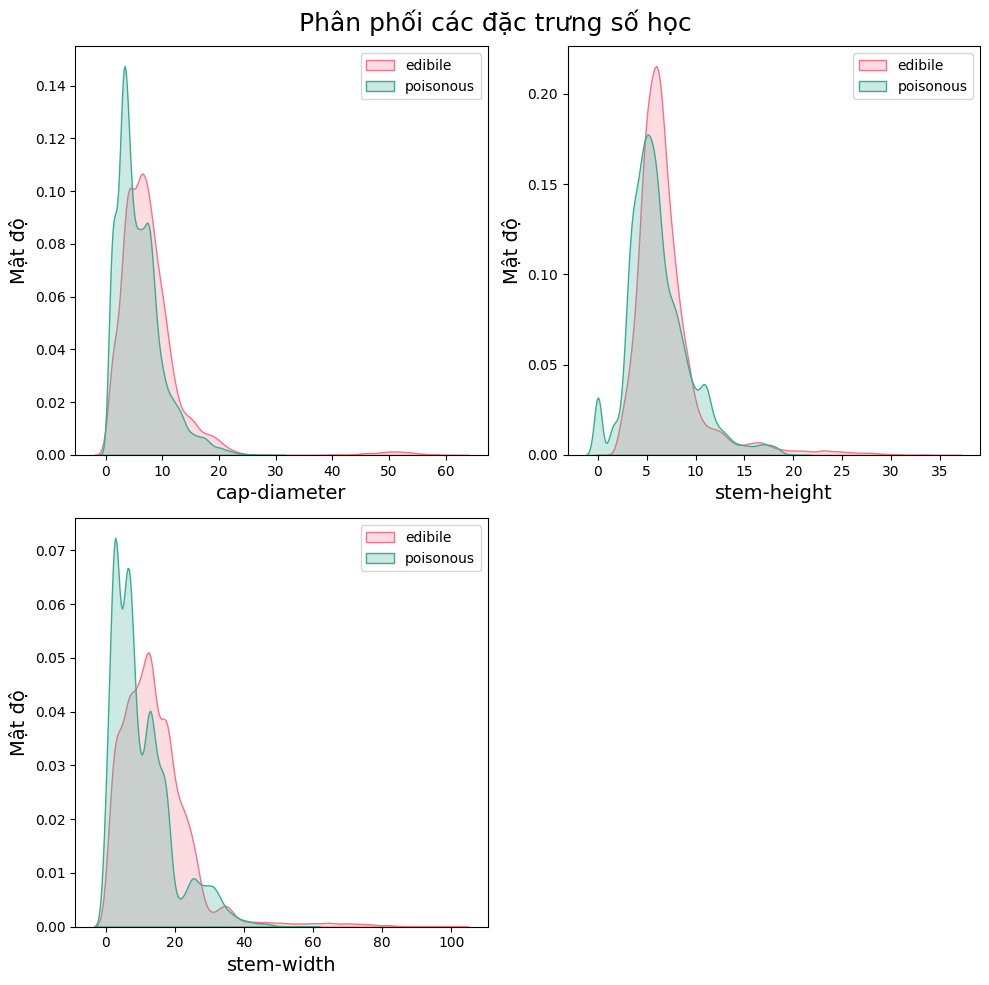

In [ ]:
n_rows = 2
n_cols = 2
size = 5
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*size,n_rows*size))
fig.suptitle("Phân phối các đặc trưng số học",fontsize=18)
k=-1
for i in range(0,n_rows):
  for j in range(0,n_cols):
    k+=1
    if k<len(num_feats):
      ax_i = ax[i,j]
      sns.kdeplot(data.loc[(data['class']=='edibile'),num_feats[k]], fill=True, label='edibile', ax=ax_i)
      sns.kdeplot(data.loc[(data['class']=='poisonous'),num_feats[k]], fill=True, label='poisonous', ax=ax_i)
      ax_i.legend(labels=['edibile','poisonous'])
      ax_i.set_ylabel("Mật độ",fontsize=14)
      ax_i.set_xlabel(num_feats[k],fontsize=14)
ax.flat[-1].set_visible(False)
plt.tight_layout()

In [ ]:
cn = num_feats.copy()
cn.append("class")
cn

['cap-diameter', 'stem-height', 'stem-width', 'class']

Text(0.5, 1.025, 'Mối tương quan giữa các chiều dữ liệu')

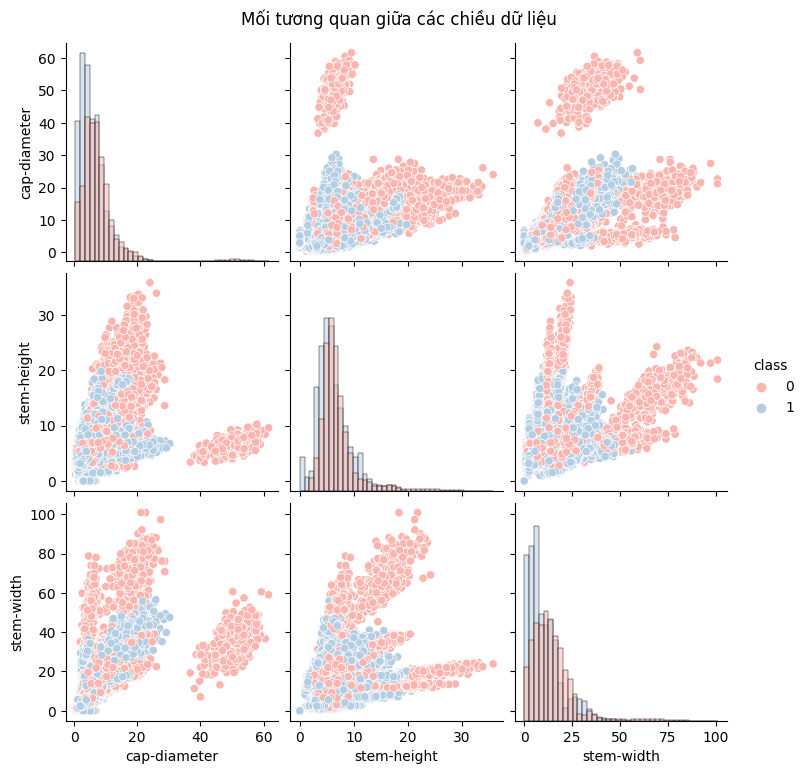

In [ ]:
pp=sns.pairplot(data.loc[:, cn], hue="class", diag_kind="hist", diag_kws = {'bins':40})
pp.fig.suptitle("Mối tương quan giữa các chiều dữ liệu",y=1.025)

Text(0.5, 1.025, 'Mối tương quan giữa các chiều dữ liệu')

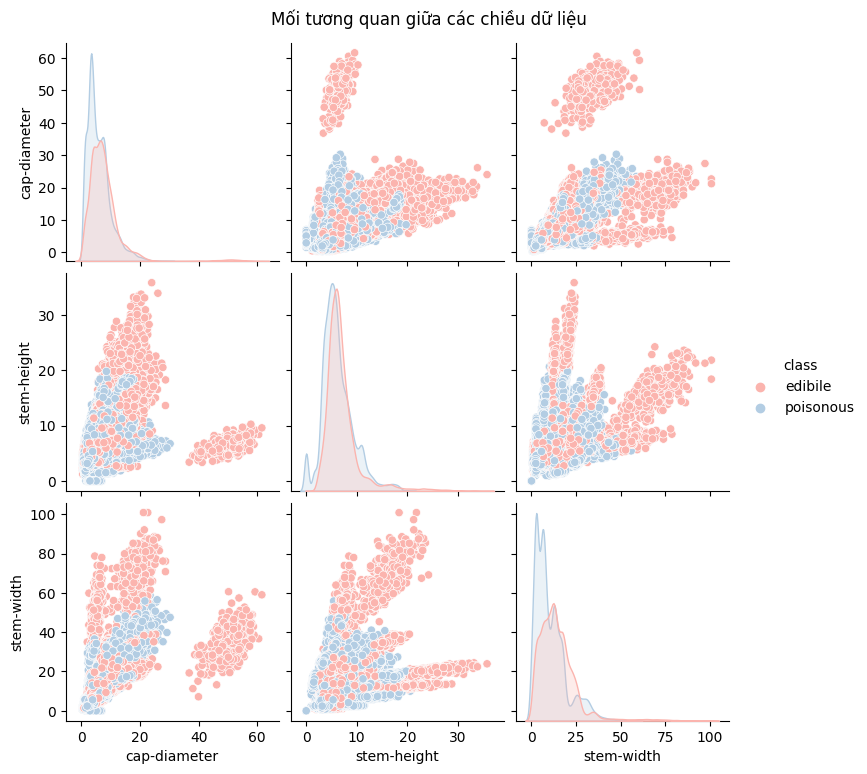

In [ ]:
pp=sns.pairplot(data.loc[:, cn], hue="class")
pp.fig.suptitle("Mối tương quan giữa các chiều dữ liệu",y=1.025)

In [ ]:
cn2 = bin_feats.copy()
for i in nom_feats:
    cn2.append(i)
cn2

['class',
 'does-bruise-or-bleed',
 'has-ring',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'ring-type',
 'habitat',
 'season']

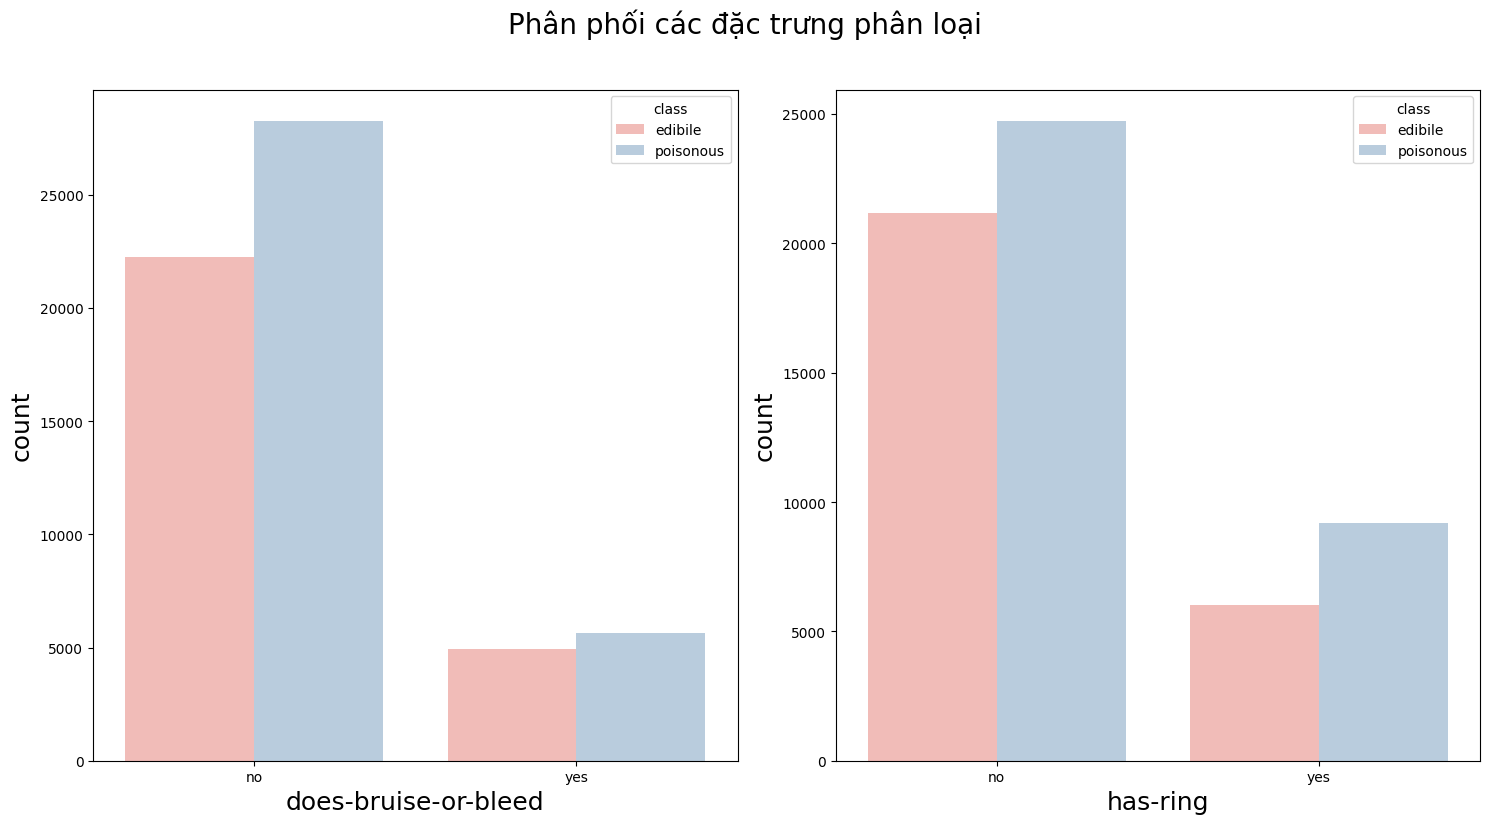

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
axes_flat = axes.flatten()
fig.suptitle("Phân phối các đặc trưng phân loại",fontsize=20,y=1.025)
index=1
for i, ax in enumerate(axes_flat):
    ax_i = sns.countplot(x=cn2[index], hue='class', data=data, ax=ax)
    ax_i.set_xlabel(cn2[index], fontsize=18)
    ax_i.set_ylabel("count", fontsize=18)
    index+=1
plt.tight_layout()

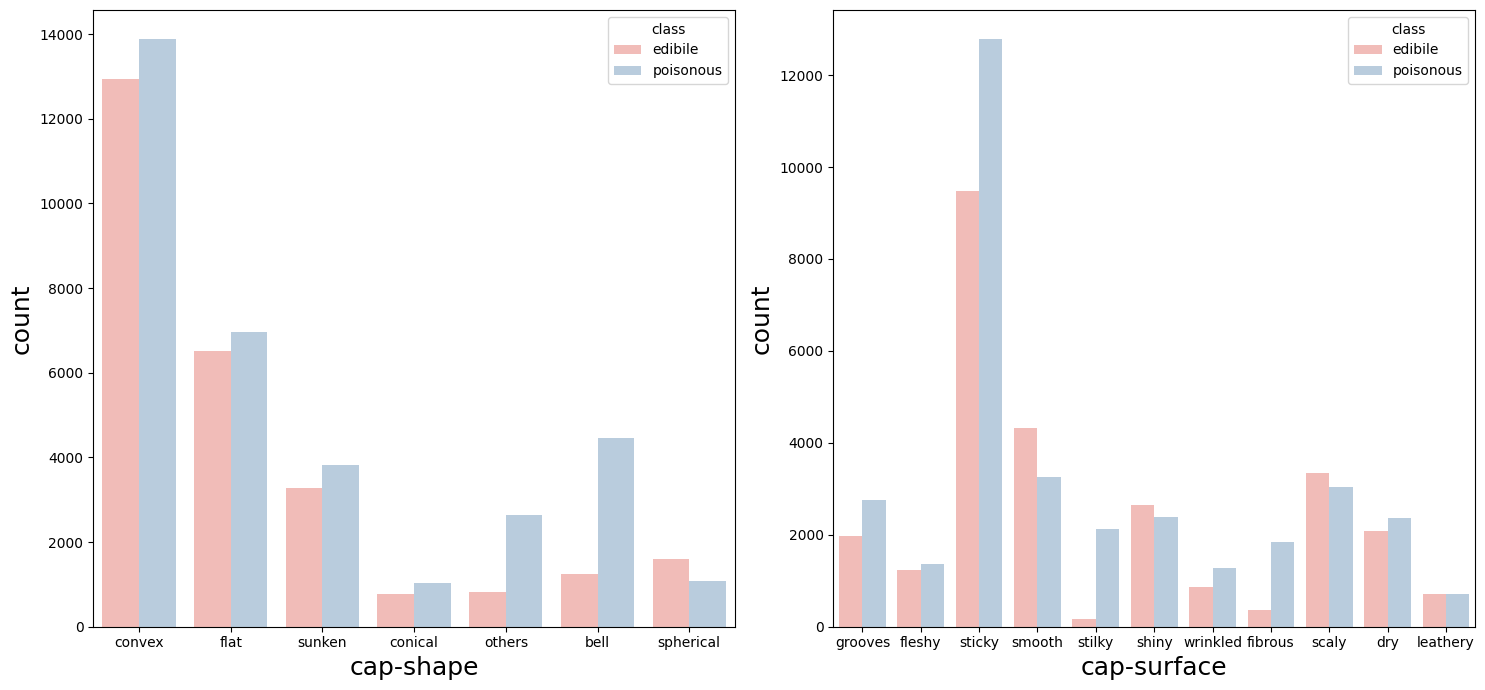

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes_flat = axes.flatten()
for i, ax in enumerate(axes_flat):
    ax_i = sns.countplot(x=cn2[index], hue='class', data=data, ax=ax)
    ax_i.set_xlabel(cn2[index], fontsize=18)
    ax_i.set_ylabel("count", fontsize=18)
    index+=1
plt.tight_layout()

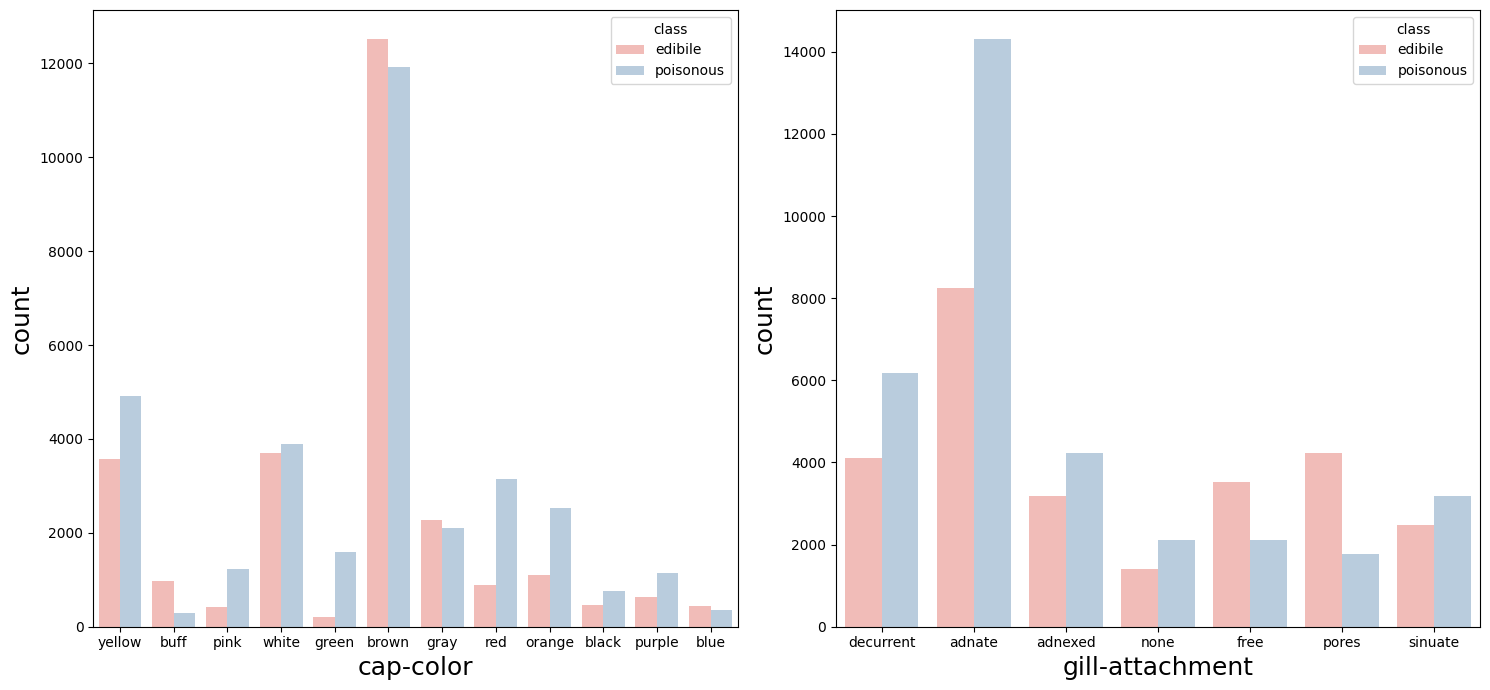

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes_flat = axes.flatten()
for i, ax in enumerate(axes_flat):
    ax_i = sns.countplot(x=cn2[index], hue='class', data=data, ax=ax)
    ax_i.set_xlabel(cn2[index], fontsize=18)
    ax_i.set_ylabel("count", fontsize=18)
    index+=1
plt.tight_layout()

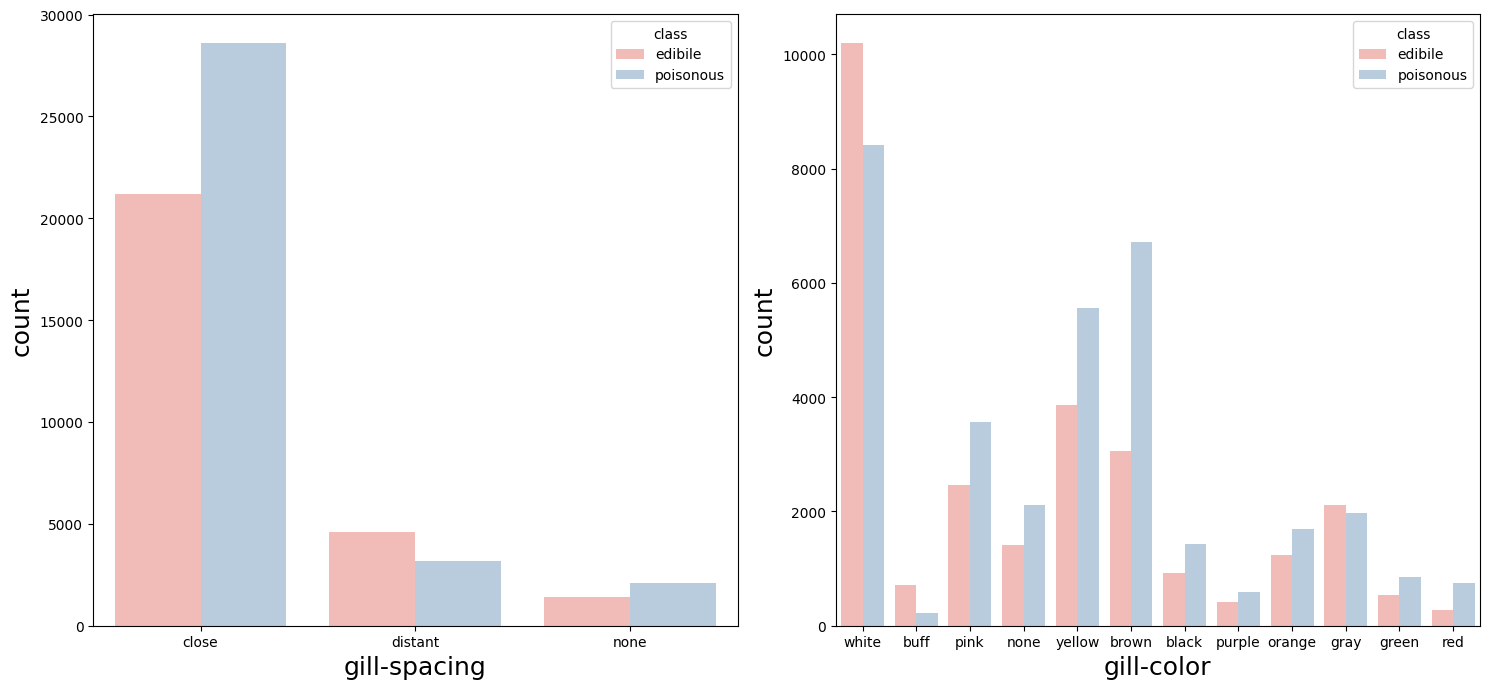

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes_flat = axes.flatten()
for i, ax in enumerate(axes_flat):
    ax_i = sns.countplot(x=cn2[index], hue='class', data=data, ax=ax)
    ax_i.set_xlabel(cn2[index], fontsize=18)
    ax_i.set_ylabel("count", fontsize=18)
    index+=1
plt.tight_layout()

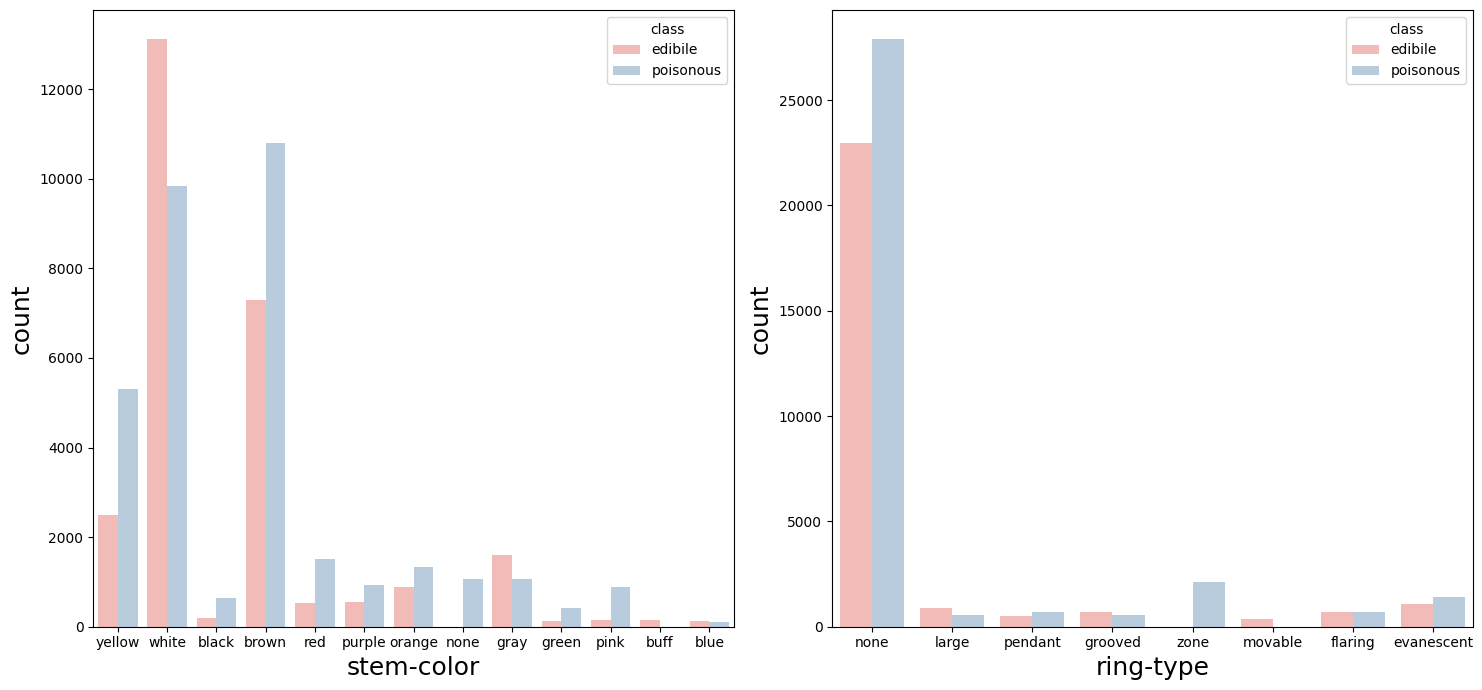

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes_flat = axes.flatten()
for i, ax in enumerate(axes_flat):
    ax_i = sns.countplot(x=cn2[index], hue='class', data=data, ax=ax)
    ax_i.set_xlabel(cn2[index], fontsize=18)
    ax_i.set_ylabel("count", fontsize=18)
    index+=1
plt.tight_layout()

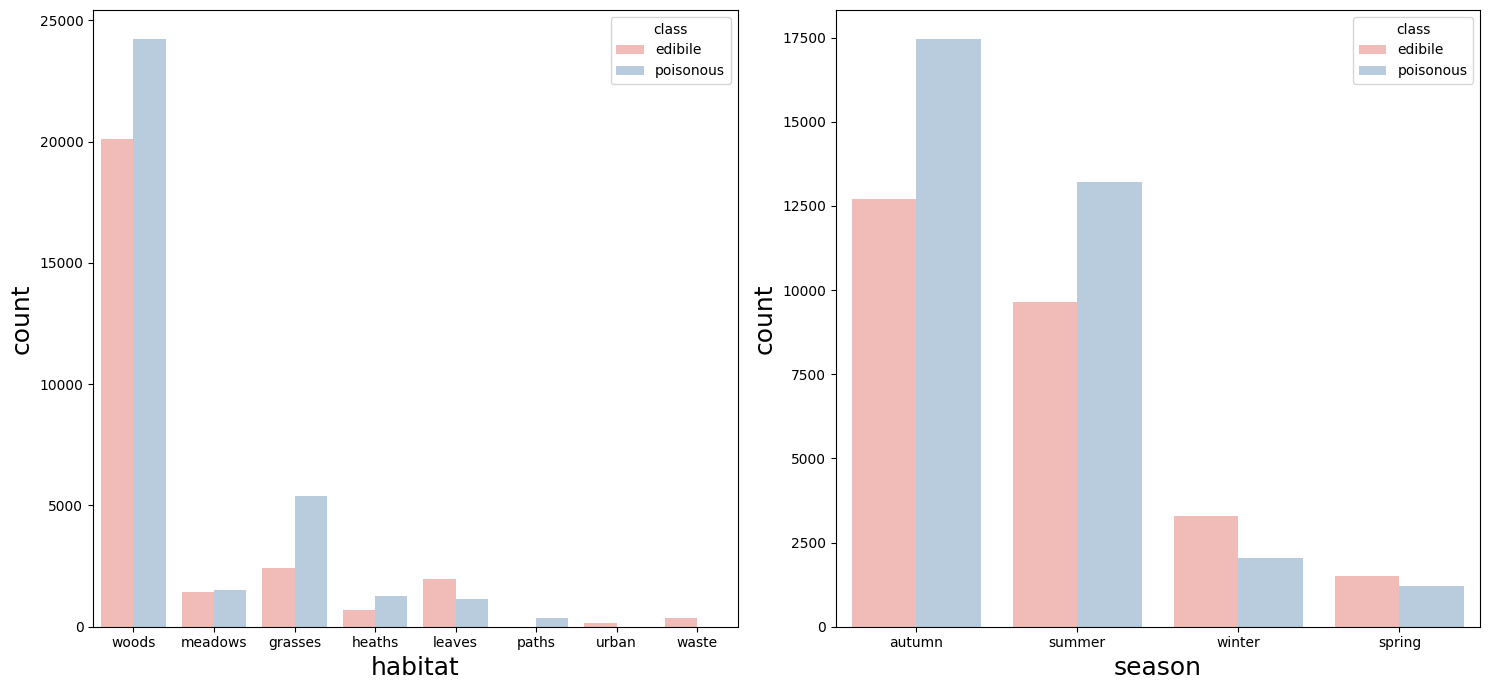

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
axes_flat = axes.flatten()
for i, ax in enumerate(axes_flat):
    ax_i = sns.countplot(x=cn2[index], hue='class', data=data, ax=ax)
    ax_i.set_xlabel(cn2[index], fontsize=18)
    ax_i.set_ylabel("count", fontsize=18)
    index+=1
plt.tight_layout()

# **CORR MATTRIX**

In [ ]:
X = data.drop(columns=['class'])
y = data['class']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 1])

<ipython-input-108-e5d512932e40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = X.corr()


Text(0.5, 1.0, 'Tương quan số học')

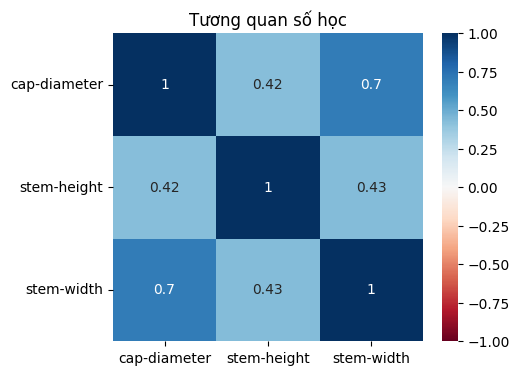

In [ ]:
corr_mat = X.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr_mat, cmap='RdBu', vmin=-1, vmax=1, annot=True,ax=ax)
plt.yticks(rotation=360)
plt.title('Tương quan số học')

In [ ]:
y1=pd.DataFrame(y)
y1.columns=['class']

<ipython-input-104-4e6dfedeaeaa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = pd.concat([y1,X], axis=1).corr()


Text(0.5, 1.0, 'Tương quan lưỡng điểm')

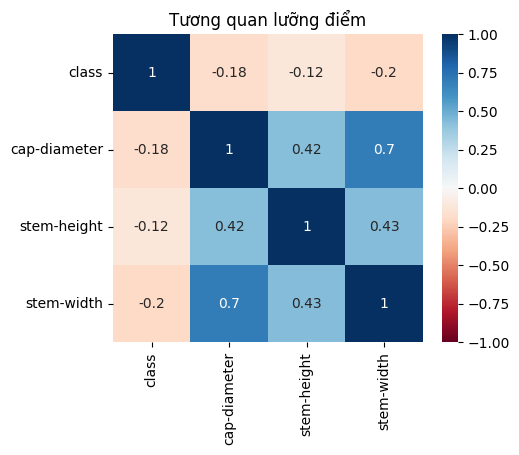

In [ ]:
corr_mat = pd.concat([y1,X], axis=1).corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr_mat, cmap='RdBu', vmin=-1, vmax=1, annot=True,ax=ax)
plt.title('Tương quan lưỡng điểm')

In [ ]:
X1 = data.drop(columns=num_feats)

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season
0,edibile,convex,grooves,yellow,no,decurrent,close,white,yellow,no,none,woods,autumn
1,edibile,flat,fleshy,buff,no,adnate,close,buff,white,yes,none,woods,autumn
2,poisonous,convex,grooves,pink,no,adnate,close,pink,black,no,none,woods,summer
3,poisonous,convex,sticky,pink,no,adnexed,close,white,white,no,none,woods,autumn
4,edibile,flat,smooth,white,no,decurrent,distant,white,white,no,none,meadows,autumn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,poisonous,convex,fleshy,brown,yes,pores,close,red,yellow,no,none,woods,summer
61065,poisonous,convex,dry,white,no,adnate,distant,pink,white,no,none,grasses,summer
61066,edibile,sunken,sticky,purple,no,sinuate,close,purple,purple,no,none,woods,autumn
61067,poisonous,sunken,wrinkled,purple,no,adnate,close,purple,purple,no,none,leaves,autumn


In [ ]:
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(corr_mat.corr().round(2), cmap='RdBu', annot=True, ax=ax)

In [ ]:
le = LabelEncoder()
X2 = X1.copy()
for i in X1:
  X2[i]=le.fit_transform(X1[i])
X2

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season
0,0,2,3,11,0,2,0,10,12,0,5,7,0
1,0,3,2,3,0,0,0,2,11,1,5,7,0
2,1,2,3,7,0,0,0,7,0,0,5,7,2
3,1,2,8,7,0,1,0,10,11,0,5,7,0
4,0,3,7,10,0,2,1,10,11,0,5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,1,2,2,2,1,5,0,9,12,0,5,7,2
61065,1,2,0,10,0,0,1,7,11,0,5,0,2
61066,0,6,8,8,0,6,0,8,9,0,5,7,0
61067,1,6,10,8,0,0,0,8,9,0,5,2,0


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))

In [ ]:
rows= []
for var1 in X2:
  col = []
  for var2 in X2 :
    cramers =cramers_V(X2[var1], X2[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  rows.append(col)

cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = X2.columns, index =X2.columns)
df.head()

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-color,has-ring,ring-type,habitat,season
class,1.00,0.19,0.22,0.24,0.02,0.22,0.11,0.19,0.27,0.06,0.20,0.18,0.12
cap-shape,0.19,1.00,0.21,0.15,0.33,0.36,0.42,0.31,0.27,0.23,0.18,0.17,0.16
cap-surface,0.22,0.21,1.00,0.18,0.23,0.28,0.30,0.22,0.20,0.32,0.21,0.15,0.11
cap-color,0.24,0.15,0.18,1.00,0.15,0.20,0.19,0.26,0.32,0.18,0.15,0.16,0.11
does-bruise-or-bleed,0.02,0.33,0.23,0.15,1.00,0.43,0.15,0.23,0.21,0.02,0.21,0.13,0.15


<Axes: >

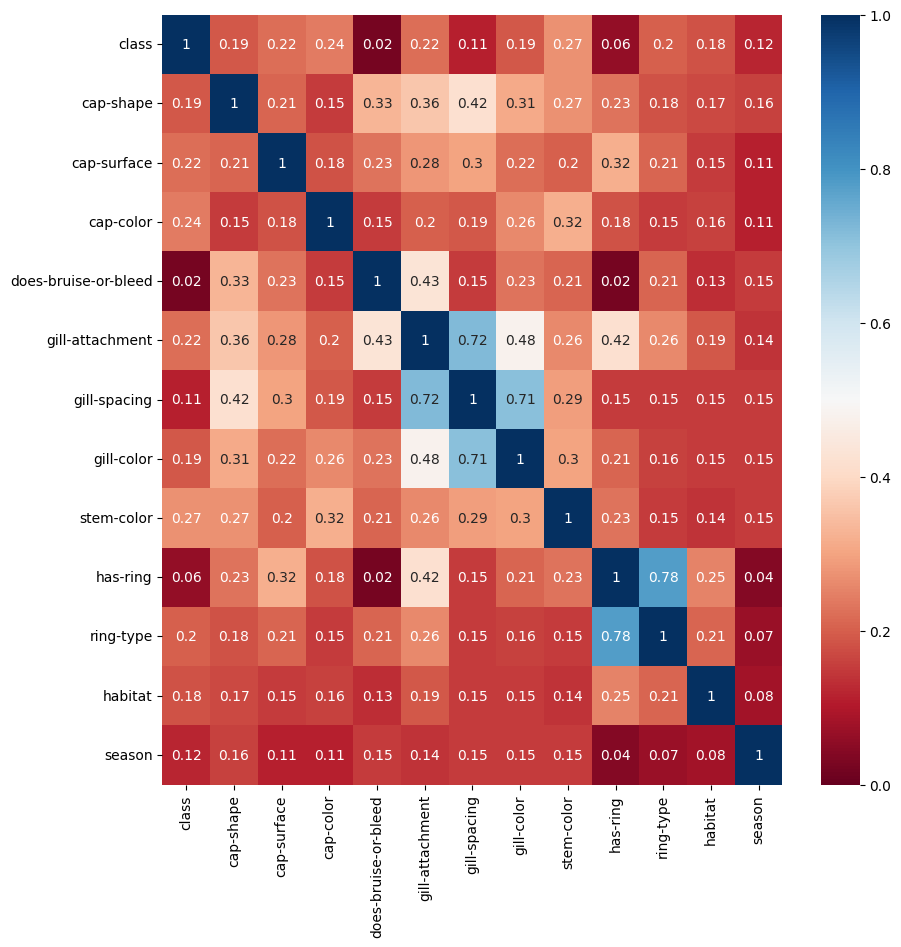

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df,cmap='RdBu', vmin=0., vmax=1, annot=True, ax=ax)

In [ ]:
dummies_df = pd.get_dummies(X1,dtype=int,drop_first=True)
dummies_df.head()

NameError: ignored

In [ ]:
rows= []
for var1 in dummies_df:
  col = []
  for var2 in dummies_df :
    cramers =cramers_V(dummies_df[var1], dummies_df[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V
  rows.append(col)

cramers_results = np.array(rows)
dummies_df = pd.DataFrame(cramers_results, columns = dummies_df.columns, index =dummies_df.columns)
dummies_df.head()

,class_poisonous,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_others,cap-shape_spherical,cap-shape_sunken,cap-surface_fibrous,cap-surface_fleshy,cap-surface_grooves,...,habitat_heaths,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,season_spring,season_summer,season_winter
class_poisonous,1.00,0.01,0.07,0.04,0.10,0.07,0.01,0.11,0.01,0.02,...,0.03,0.09,0.02,0.07,0.05,0.08,0.03,0.05,0.04,0.11
cap-shape_conical,0.01,1.00,0.15,0.09,0.04,0.04,0.06,0.15,0.05,0.12,...,0.00,0.06,0.04,0.09,0.01,0.01,0.05,0.08,0.01,0.05
cap-shape_convex,0.07,0.15,1.00,0.47,0.22,0.19,0.32,0.08,0.09,0.03,...,0.03,0.08,0.07,0.07,0.04,0.00,0.08,0.09,0.01,0.00
cap-shape_flat,0.04,0.09,0.47,1.00,0.13,0.11,0.19,0.04,0.02,0.08,...,0.02,0.08,0.04,0.01,0.03,0.06,0.04,0.06,0.03,0.05
cap-shape_others,0.10,0.04,0.22,0.13,1.00,0.05,0.09,0.05,0.01,0.07,...,0.04,0.01,0.06,0.15,0.01,0.02,0.10,0.19,0.00,0.04


<Axes: >

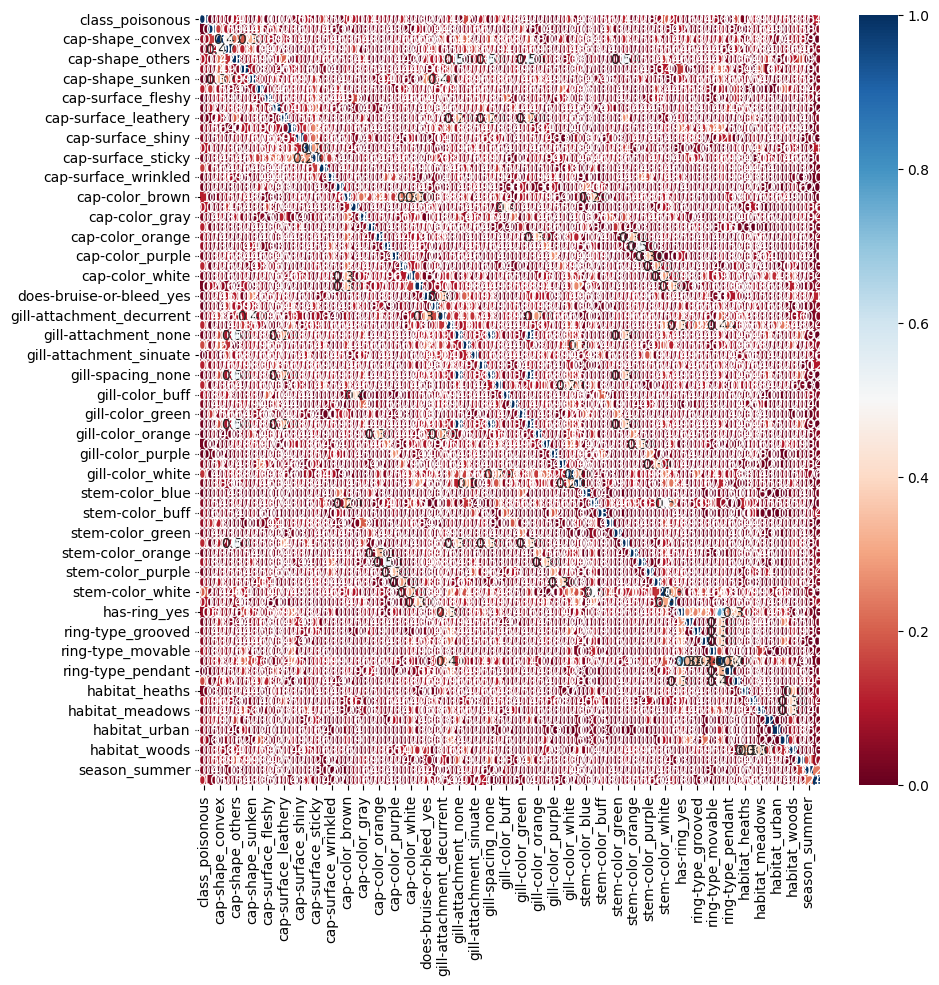

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dummies_df,cmap='RdBu', vmin=0., vmax=1, annot=True, ax=ax)

# **DATA ENCODE**

In [60]:
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,edibile,1.26,convex,grooves,yellow,no,decurrent,close,white,5.04,1.73,yellow,no,none,woods,autumn
1,edibile,10.32,flat,fleshy,buff,no,adnate,close,buff,4.68,19.44,white,yes,none,woods,autumn
2,poisonous,0.92,convex,grooves,pink,no,adnate,close,pink,4.59,1.15,black,no,none,woods,summer
3,poisonous,4.27,convex,sticky,pink,no,adnexed,close,white,4.55,6.52,white,no,none,woods,autumn
4,edibile,3.08,flat,smooth,white,no,decurrent,distant,white,2.67,5.18,white,no,none,meadows,autumn


In [61]:
X = data.drop(columns=['class'])
y = data['class']

In [62]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 1])

*Label Encoding*

In [63]:
le=LabelEncoder()
X_label_encoded = X.copy()
for i in X_label_encoded:
    if i not in num_feats:
        X_label_encoded[i]=le.fit_transform(X[i])
X_label_encoded.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1.26,2,3,11,0,2,0,10,5.04,1.73,12,0,5,7,0
1,10.32,3,2,3,0,0,0,2,4.68,19.44,11,1,5,7,0
2,0.92,2,3,7,0,0,0,7,4.59,1.15,0,0,5,7,2
3,4.27,2,8,7,0,1,0,10,4.55,6.52,11,0,5,7,0
4,3.08,3,7,10,0,2,1,10,2.67,5.18,11,0,5,3,0


**Dummies Encoding**

In [64]:
X_dummies = pd.get_dummies(X,dtype=int,drop_first=True)
X_dummies.head()

,cap-diameter,stem-height,stem-width,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_others,cap-shape_spherical,cap-shape_sunken,cap-surface_fibrous,...,habitat_heaths,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,season_spring,season_summer,season_winter
0,1.26,5.04,1.73,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,10.32,4.68,19.44,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.92,4.59,1.15,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,4.27,4.55,6.52,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3.08,2.67,5.18,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# **Install Lib**

In [25]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.4 MB/s eta 0:00:00


In [26]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=1011e6d814d393091ebadb1cdd8a4cbf63b6b46c9d1b5ec94f40b6389dd4d9c4
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [27]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 10.9 MB/s eta 0:00:00


# **Validation**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_dummies, y, test_size=0.2, random_state=30)

# **Permutation Importance and SHAP**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_model.score(X_val, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7771409857540528

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(log_model, X_val, y_val, n_repeats=30, random_state=0)

for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f"{X_dummies.columns[i]:<8}"
          f"{r.importances_mean[i]:.3f}"
          f" +/- {r.importances_std[i]:.3f}")

cap-shape_convex0.066 +/- 0.003
stem-color_white0.053 +/- 0.002
gill-attachment_pores0.049 +/- 0.002
cap-shape_flat0.035 +/- 0.002
cap-shape_sunken0.030 +/- 0.001
cap-surface_stilky0.023 +/- 0.001
season_winter0.017 +/- 0.001
ring-type_zone0.014 +/- 0.001
cap-shape_spherical0.013 +/- 0.001
stem-color_gray0.012 +/- 0.001
cap-surface_fibrous0.011 +/- 0.001
gill-attachment_free0.011 +/- 0.001
cap-color_green0.010 +/- 0.001
cap-color_red0.010 +/- 0.001
habitat_woods0.010 +/- 0.001
stem-color_none0.009 +/- 0.001
cap-color_brown0.009 +/- 0.002
ring-type_none0.009 +/- 0.001
season_spring0.009 +/- 0.001
stem-color_orange0.009 +/- 0.001
habitat_leaves0.009 +/- 0.001
cap-shape_conical0.008 +/- 0.001
gill-color_yellow0.008 +/- 0.002
ring-type_movable0.008 +/- 0.000
cap-surface_wrinkled0.005 +/- 0.000
stem-color_pink0.004 +/- 0.001
cap-color_blue0.004 +/- 0.001
habitat_waste0.004 +/- 0.000
cap-diameter0.004 +/- 0.001
cap-surface_shiny0.003 +/- 0.001
gill-color_red0.003 +/- 0.000
cap-surface_leathe

In [ ]:
import numpy as np
import pandas as pd


train_X, val_X, train_y, val_y = train_test_split(X_dummies, y, random_state=1)
rf_model = RandomForestClassifier(n_estimators=100,random_state=0).fit(train_X, train_y)

In [ ]:
rf_model.score(val_X, val_y)

0.999803510610427

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0450 ± 0.0014,stem-color_white
0.0347 ± 0.0010,gill-attachment_pores
0.0252 ± 0.0023,stem-width
0.0185 ± 0.0016,gill-spacing_distant
0.0151 ± 0.0018,gill-color_white
0.0113 ± 0.0011,stem-height
0.0033 ± 0.0005,has-ring_yes
0.0026 ± 0.0008,cap-diameter
0.0023 ± 0.0002,cap-color_red
0.0021 ± 0.0005,cap-color_brown


In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X_dummies, y, random_state=1)
rf_classifier = RandomForestClassifier( n_estimators=400,
                                        criterion='gini',
                                        max_depth=80,
                                        max_features='log2',
                                        min_samples_leaf=1,
                                        min_samples_split=5,
                                        bootstrap=False,
                                        random_state=0)
rf_classifier.fit(train_X, train_y)

RandomForestClassifier(bootstrap=False, max_depth=80, max_features='log2',
                       min_samples_split=5, n_estimators=400, random_state=0)

In [ ]:
y_pred = rf_classifier.predict(val_X)
print(f"\nF1-Score : {f1_score(val_y, y_pred):.3f}")
print(f"AUC - ROC Score : {roc_auc_score(val_y, rf_classifier.predict_proba(val_X)[:, 1]):.3f}", end="\n\n")
print(classification_report(val_y, y_pred))


F1-Score : 1.000
AUC - ROC Score : 1.000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6795
           1       1.00      1.00      1.00      8473

    accuracy                           1.00     15268
   macro avg       1.00      1.00      1.00     15268
weighted avg       1.00      1.00      1.00     15268



In [ ]:
import shap

In [ ]:
shap.initjs()

In [ ]:
xxx = X_dummies.reset_index(drop=True).loc[0:300, :]
xxx

,cap-diameter,stem-height,stem-width,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_others,cap-shape_spherical,cap-shape_sunken,cap-surface_fibrous,...,habitat_heaths,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,season_spring,season_summer,season_winter
0,1.26,5.04,1.73,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,10.32,4.68,19.44,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.92,4.59,1.15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4.27,4.55,6.52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.08,2.67,5.18,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,11.40,4.49,18.85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
297,25.29,14.98,83.30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
298,7.14,8.14,11.63,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
299,3.18,3.23,5.43,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
xxx = X_dummies.reset_index(drop=True).loc[0:300, :]
explainer = shap.Explainer(rf_model.predict, xxx)
shap_values = explainer(xxx)

TypingError: ignored

In [ ]:
shap.plots.waterfall(shap_values[0], max_display=xxx.shape[1])

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)

KeyboardInterrupt: ignored

# **SPLIT DATA**

**Split**

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.2, random_state=30)

# **FEATURE SELECTION**

In [ ]:
from sklearn.preprocessing import FunctionTransformer

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(x):
    cols_remove = []
    while True:
        temp_x = X.drop(cols_remove, axis=1)
        vf = pd.DataFrame()
        vf['columns'] = temp_x.columns
        vf['VIF score'] = [variance_inflation_factor(temp_x.values, i) for i in range(len(temp_x.columns))]
        vf.sort_values(by='VIF score', ascending=False, inplace=True)
        vf.reset_index(drop=True, inplace=True)
        if vf.loc[0, 'VIF score'] > 5:
            print(vf.loc[0, 'columns'], vf.loc[0, 'VIF score'])
            cols_remove.append(vf.loc[0, 'columns'])
        else:
            break

    return cols_remove

In [ ]:
for i in X_dummies.isna().sum():
  if i>0:
    print(i)

In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X_dummies, y)

In [ ]:
mi_cols_remove_ind = np.where(mi_score < 0.001)
mi_cols_remove = X_dummies.columns[mi_cols_remove_ind[0]]
mi_cols_remove

Index(['cap-shape_conical', 'cap-shape_flat', 'cap-shape_sunken',
       'cap-surface_grooves', 'cap-surface_scaly', 'cap-surface_wrinkled',
       'cap-color_blue', 'cap-color_orange', 'cap-color_purple',
       'gill-attachment_adnexed', 'gill-attachment_sinuate',
       'gill-spacing_none', 'gill-color_gray', 'gill-color_none',
       'gill-color_red', 'stem-color_blue', 'stem-color_buff',
       'stem-color_green', 'stem-color_purple', 'ring-type_flaring',
       'ring-type_large', 'ring-type_pendant', 'habitat_meadows'],
      dtype='object')

In [ ]:
def MI_remover(x):
    x = x.drop(mi_cols_remove, axis=1)
    return x

mi_remove_col_transformer = FunctionTransformer(MI_remover)

# **SCALER**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

# **TRAINING**

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import neighbors
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import naive_bayes

In [30]:
from sklearn import metrics

In [31]:
model_names = []
cnf_matrixs = []

In [ ]:
def cnf_matrix_plots(n):
  n_rows = 6
  n_cols = 2
  size = 5
  fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*size,n_rows*size))
  k=-1
  for i in range(0,n_rows):
    for j in range(0,n_cols):
      k+=1
      if k<n:
        ax_i = ax[i,j]
        class_names=[0,1] # name  of classes
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrixs[k]), annot=True, cmap="YlGnBu" ,fmt='g', ax=ax_i)
        ax_i.xaxis.set_label_position("bottom")
        plt.tight_layout()
        ax_i.set_title(model_names[k])
        ax_i.set_ylabel('Actual label')
        ax_i.set_xlabel('Predicted label')
        plt.tight_layout()

In [66]:
model_names = []
cnf_matrixs = []
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SupportVectorMachines': SVC(),
    'Decision Trees': tree.DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(learning_rate=0.5, random_state=2),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'NeuralNetwork': nn_model,
    'LightGBMClassifier': LGBMClassifier(),
    'XGBoost': XGBClassifier(objective='reg:squarederror', random_state=42, learning_rate=0.03, n_estimators=150, max_depth=9),
    'CatBoostRegressor': CatBoostClassifier(metric_period=100)
}
for model_name, model_instance in models.items():
    print(f"-----{model_name}-----")
    if model_name!='NeuralNetwork':
      model_instance.fit(X_train, y_train)
      y_pred = model_instance.predict(X_test)
      print(classification_report(y_test, y_pred))
      model_names.append(model_name)
      cnf_matrixs.append(metrics.confusion_matrix(y_test, y_pred))
    else:
      prediction = model_instance.predict(X_test)
      prediction = np.argmax(prediction, axis=-1)
      nn_confusion_matrix=  metrics.confusion_matrix(y_test, prediction)
      model_names.append(model_name)
      cnf_matrixs.append(nn_confusion_matrix)

-----LogisticRegression-----
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      5375
           1       0.80      0.80      0.80      6839

    accuracy                           0.78     12214
   macro avg       0.77      0.77      0.77     12214
weighted avg       0.78      0.78      0.78     12214

-----KNeighborsClassifier-----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5375
           1       1.00      1.00      1.00      6839

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214

-----SupportVectorMachines-----
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5375
           1       0.91      0.91      0.91      6839

    accuracy                           0.90     12214
   macro avg       0.90      0.90   

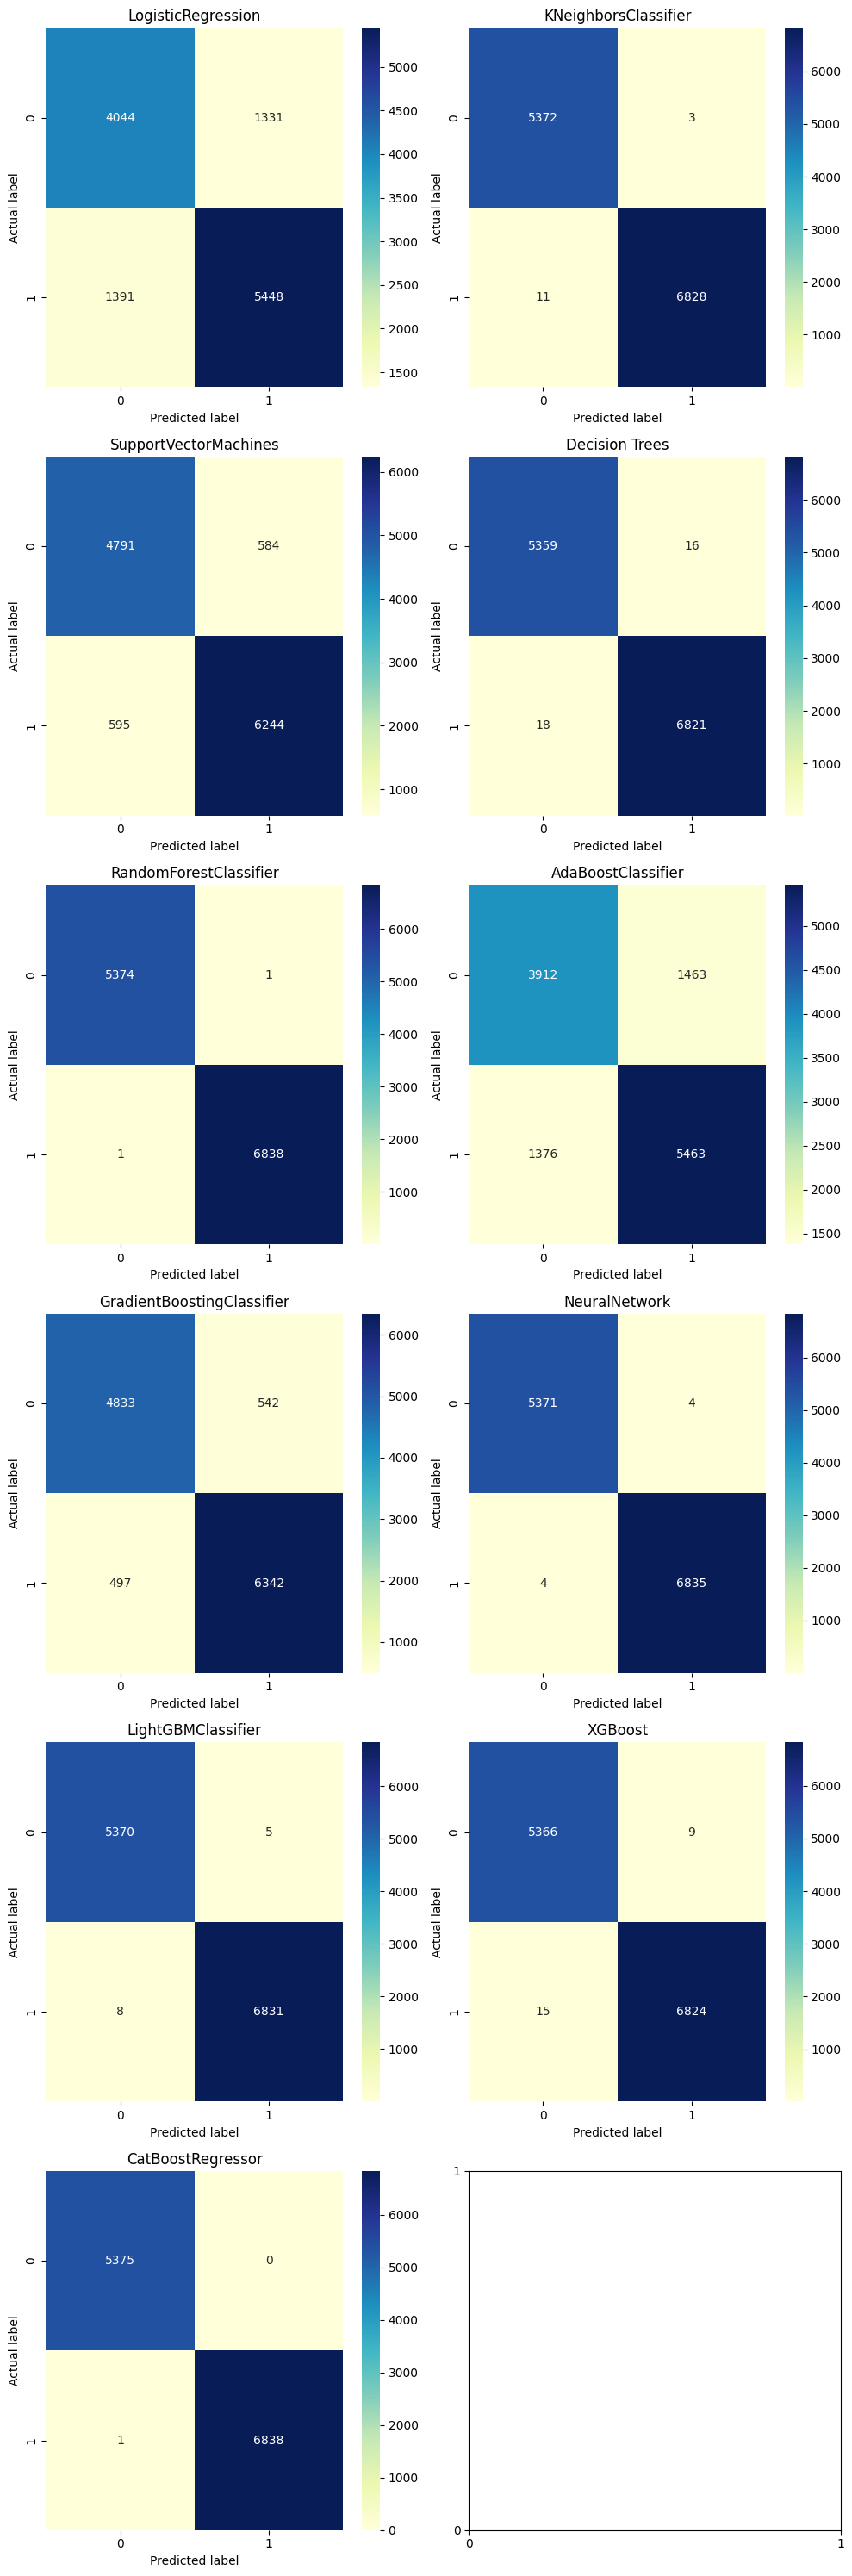

In [ ]:
cnf_matrix_plots(len(models))

# ROC SCORE

In [1]:
for model_name, model_instance in models.items():
  if model_name!='NeuralNetwork':
    y_pred_proba = model_instance.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

NameError: ignored

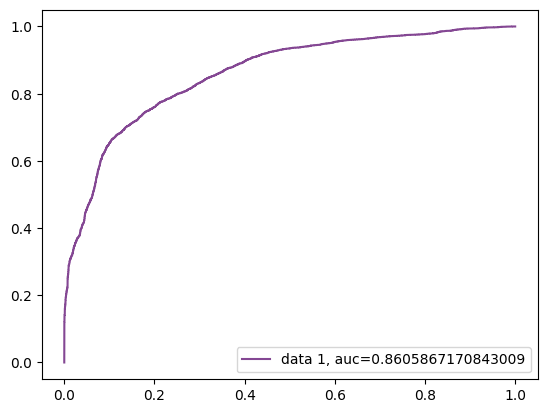

In [ ]:
y_pred_proba = log_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


# Neural Network

In [42]:
from keras.models import Sequential
import keras
from keras.layers import Dense, Dropout

In [43]:
y_train_nn = keras.utils.to_categorical(y_train, num_classes=2)

In [44]:
nn_model = Sequential()
nn_model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(units=32, activation='relu'))
nn_model.add(Dropout(0.50))
nn_model.add(Dense(units=32, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(units=2, activation='softmax'))


In [45]:
nn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                2592      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 4770 (18.63 KB)
Trainable params: 4770 (

In [46]:
nn_model.fit(X_train, y_train_nn, batch_size=500, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
79/79 - 1s - loss: 0.8469 - accuracy: 0.5334 - val_loss: 0.6662 - val_accuracy: 0.5826 - 1s/epoch - 18ms/step
Epoch 2/100
79/79 - 0s - loss: 0.6414 - accuracy: 0.6045 - val_loss: 0.5727 - val_accuracy: 0.6946 - 258ms/epoch - 3ms/step
Epoch 3/100
79/79 - 0s - loss: 0.5383 - accuracy: 0.7012 - val_loss: 0.4345 - val_accuracy: 0.8267 - 257ms/epoch - 3ms/step
Epoch 4/100
79/79 - 0s - loss: 0.4157 - accuracy: 0.8146 - val_loss: 0.2934 - val_accuracy: 0.9007 - 265ms/epoch - 3ms/step
Epoch 5/100
79/79 - 0s - loss: 0.3070 - accuracy: 0.8763 - val_loss: 0.1813 - val_accuracy: 0.9451 - 236ms/epoch - 3ms/step
Epoch 6/100
79/79 - 0s - loss: 0.2203 - accuracy: 0.9172 - val_loss: 0.1114 - val_accuracy: 0.9721 - 264ms/epoch - 3ms/step
Epoch 7/100
79/79 - 0s - loss: 0.1560 - accuracy: 0.9456 - val_loss: 0.0748 - val_accuracy: 0.9743 - 224ms/epoch - 3ms/step
Epoch 8/100
79/79 - 0s - loss: 0.1196 - accuracy: 0.9602 - val_loss: 0.0465 - val_accuracy: 0.9860 - 223ms/epoch - 3ms/step
Epoch 9/10

In [47]:
prediction = nn_model.predict(X_test)

382/382 [==============================] - 1s 1ms/step


In [48]:
prediction = np.argmax(prediction, axis=-1)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
ac_score = accuracy_score(y_test, prediction)
ac_score

0.9997543802194203

In [51]:
nn_confusion_matrix=  metrics.confusion_matrix(y_test, prediction)

In [ ]:
prediction = nn_model.predict(X_test)
prediction = np.argmax(prediction, axis=-1)
nn_confusion_matrix=  metrics.confusion_matrix(y_test, prediction)